In [19]:
#libration.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 15 April 2018.
#plot librating ringlet

In [31]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'e.min() = ', e.min()
print 'e.max() = ', e.max()

r.shape =  (1001, 2, 61)
total_ring_mass =  1.5e-09
shear_viscosity =  6e-13
e.min() =  0.0032020243691147994
e.max() =  0.006214283365175613


In [32]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [33]:
#compute delta_a=a_outer-a_inner versus time
a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
a_inner = a[:, 0, :].mean(axis=1)
a_avg = (a_inner + a_outer)/2
delta_a = a_outer - a_inner

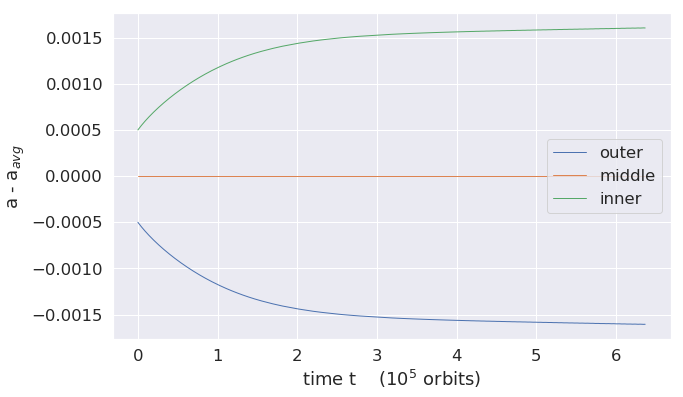

In [34]:
#plot streamline's mutual a-evolution
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
x = times/(2*np.pi)/1.0e5
y = a_inner - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='outer')
y = a_avg - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='middle')
y = a_outer - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='inner')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel('a - a$_{avg}$')
p = plt.legend(loc='center right')

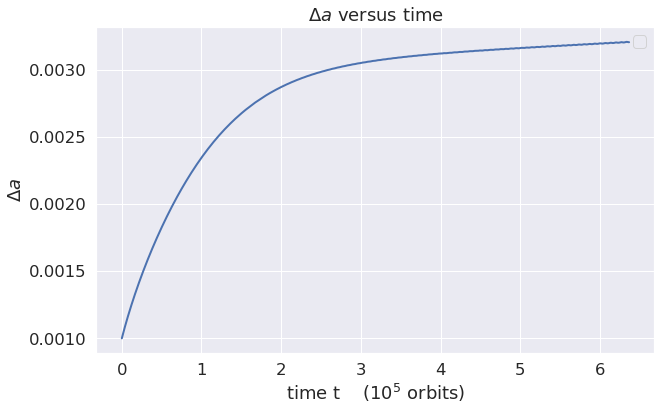

In [35]:
#plot delta_a versus time
x = times/(2*np.pi)/1.0e5
y = delta_a
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_title(r'$\Delta a$ versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta a$')
p = plt.legend()
p = plt.savefig('figs/da.png')

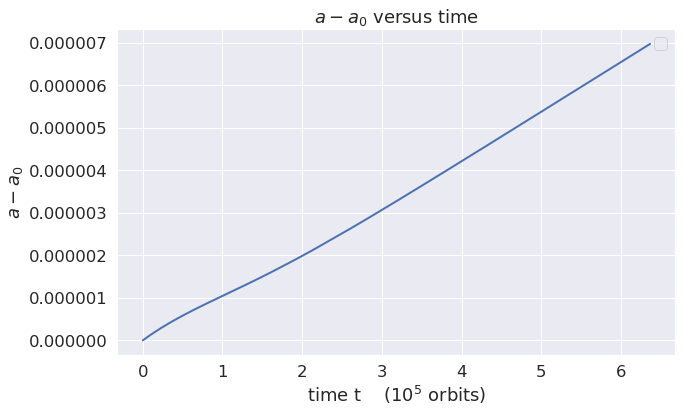

In [37]:
#plot a_avg versus time...note streamline's avg semimajor axis grows
x = times/(2*np.pi)/1.0e5
y = a_avg - a_avg[0]
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_title(r'$a - a_0$ versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$a - a_0$')
p = plt.legend()
p = plt.savefig('figs/a_avg.png')

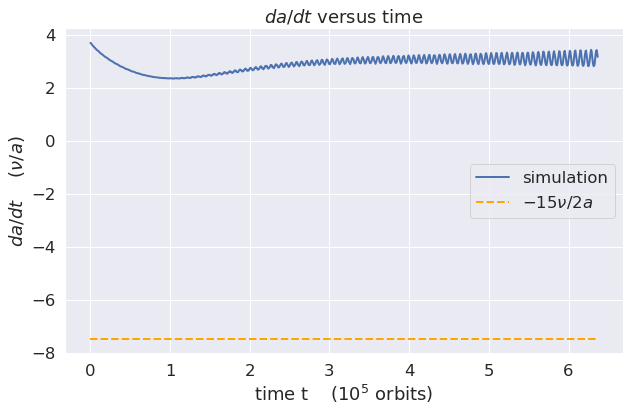

In [8]:
#plot d(a_avg)/dt versus time
x = times/(2*np.pi)/1.0e5
dt = times[1]-times[0]
da_dt = np.gradient(a_avg, dt)
y_factor = shear_viscosity/a_avg[0]
y = da_dt/y_factor
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, label='simulation')
y_exp = -(15/2.0)*shear_viscosity/a_avg/y_factor + 0*times
p = ax.plot(x, y_exp, linestyle='dashed', linewidth=2, color='orange',
    label=r'$-15\nu/2a$')
p = ax.set_title(r'$da/dt$ versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$da/dt$    ($\nu/a$)')
p = plt.legend()
p = plt.savefig('figs/da_dt.png')

In [38]:
#compute delta_e=e_outer-e_inner and e_prime = a_mid*delta_e/delta_a versus time
e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
e_inner = e[:, 0, :].mean(axis=1)
e_avg = (e_inner + e_outer)/2
delta_e = e_outer - e_inner
e_prime = a_avg*delta_e/delta_a

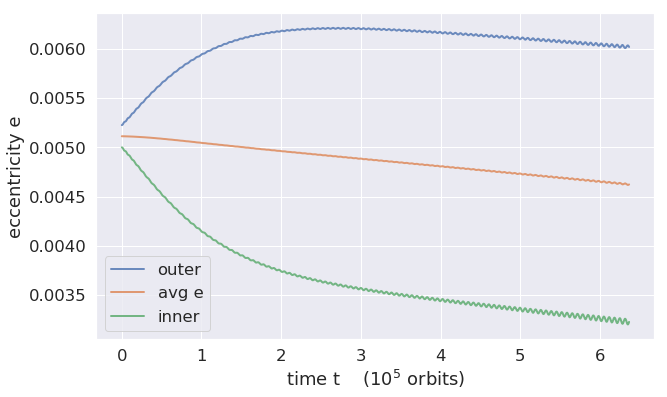

In [39]:
#plot streamline's e-evolution
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
x = times/(2*np.pi)/1.0e5
y = e_outer
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='outer')
y = e_avg
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='avg e')
y = e_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='inner')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel('eccentricity e')
p = plt.legend()

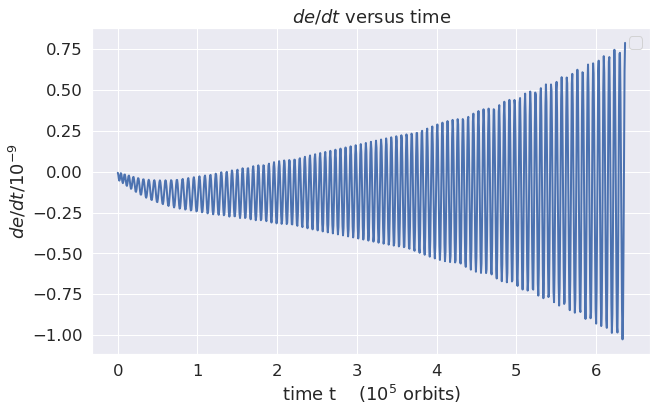

In [41]:
#plot d(e_avg)/dt versus time
x = times/(2*np.pi)/1.0e5
dt = times[1]-times[0]
de_dt = np.gradient(e_avg, dt)
y_factor = 1.0e-9
y = de_dt/y_factor
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_title(r'$de/dt$ versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$de/dt/10^{-9}$')
p = plt.legend()
p = plt.savefig('figs/de_dt.png')

In [65]:
#compute delta_w=wt_outer-wt_inner and wt_prime = a_mid*e_mid*delta_wt/delta_a 
#and q=sqrt(e_prime^2 + wt_prime^2) versus time
delta_wt_list = []
for t_idx in range(len(times)):
    s_idx = 0
    r0 = r[t_idx, s_idx]
    theta_idx = np.argmin(r0)
    wt_inner = wt[t_idx, s_idx, theta_idx]
    s_idx = 1
    r0 = r[t_idx, s_idx]
    theta_idx = np.argmin(r0)
    wt_outer = wt[t_idx, s_idx, theta_idx]
    delta_wt_list += [wt_outer - wt_inner]
delta_wt = adjust_angle(np.array(delta_wt_list))
wt_prime = a_avg*e_avg*delta_wt/delta_a
q = np.sqrt(e_prime**2 + wt_prime**2)

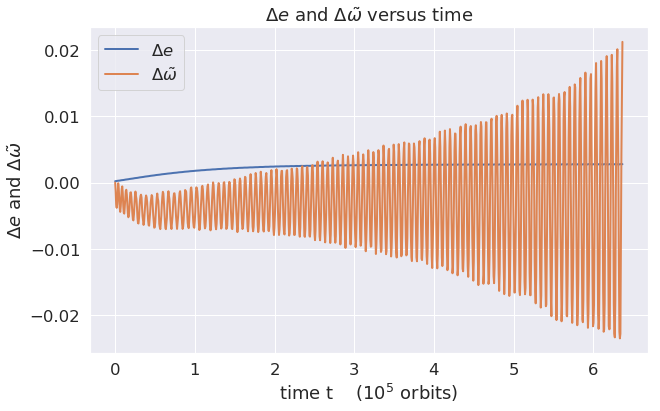

In [67]:
#plot delta_e and delta_wt versus time
x = times/(2*np.pi)/1.0e5
y = delta_e
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta e$')
y = delta_wt
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta\tilde{\omega}$')
p = ax.set_title(r'$\Delta e$ and $\Delta\tilde{\omega}$ versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta e$ and $\Delta\tilde{\omega}$')
p = plt.legend()

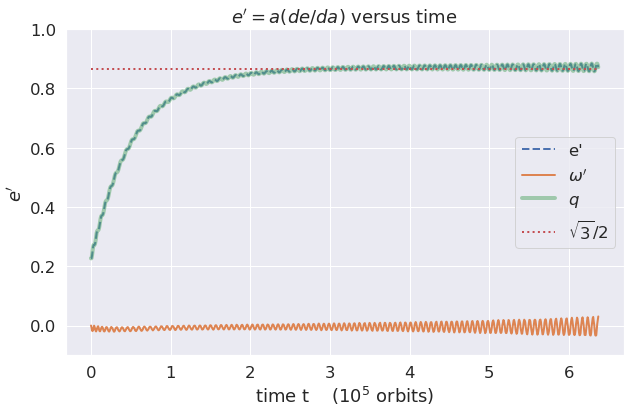

In [68]:
#plot e_prime wt_prime and q versus time
x = times/(2*np.pi)/1.0e5
y = e_prime
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='dashed', linewidth=2, label="e'")
y = wt_prime
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r"$\omega'$")
y = q
p = ax.plot(x, y, linestyle='-', linewidth=4, label=r'$q$', alpha=0.5)
p = ax.plot(x, x*0 + np.sqrt(3.0)/2.0, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_title(r"$e'=a(de/da)$ versus time")
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r"$e'$")
p = ax.set_ylim(-0.1, 1)
p = plt.legend()
p = plt.savefig('figs/adeda.png')

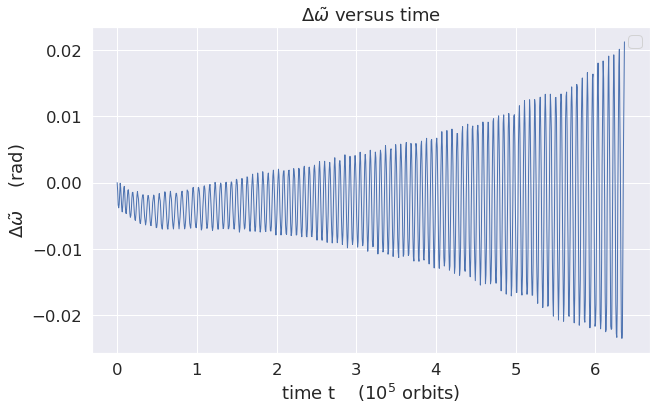

In [134]:
#plot delta_wt versus time
x = times/(2*np.pi)/1.0e5
y = delta_wt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_title(r'$\Delta\tilde{\omega}$ versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (rad)')
p = plt.legend()

In [138]:
#viscous angular momentum flux & angular momentum luminosity vs time
c = -1.0
G = -1.0
twopi = 2*np.pi
inner_torque_list = []
outer_torque_list = []
viscous_flux_list = []
for t_idx in range(len(times)):
    Ar, At = accelerations(lambda0, G_ring, shear_viscosity, c, r[t_idx], t[t_idx], vt[t_idx])
    viscous_flux = lambda0*r[t_idx]*At
    torque_per_particle = viscous_flux*(twopi*r[t_idx]/particles_per_streamline)
    viscous_flux_list += [viscous_flux]
    inner_torque_list += [torque_per_particle[0].sum()]
    outer_torque_list += [torque_per_particle[1].sum()]
inner_torque = np.array(inner_torque_list)
outer_torque = np.array(outer_torque_list)
viscous_flux = np.array(viscous_flux_list)

In [140]:
#viscous angular momentum flux & luminosity assuming circular ring at time=0
a0 = a_avg[0]
area = twopi*a0*delta_a[0]
sd0 = total_ring_mass/area
w0 = Omega(J2, Rp, a0)
viscous_flux0 = 1.5*shear_viscosity*sd0*a0*w0
viscous_luminosity0 = viscous_flux0*twopi*a0
print 'circular flux, luminosity = ', viscous_flux0, viscous_luminosity0, outer_torque[0]

circular flux, luminosity =  2.1509983131696727e-19 1.3521878557577315e-18 6.843666166572128e-19


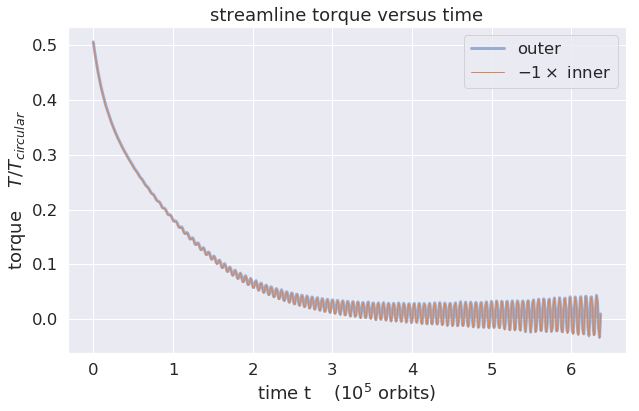

In [141]:
#plot torques versus time...off by X2 at time=0???
f, ax = plt.subplots(figsize=(10, 6))
x = times/(2*np.pi)/1.0e5
y = outer_torque/viscous_luminosity0
p = ax.plot(x, y, linestyle='-', linewidth=3, label='outer', alpha=0.5)
y = -inner_torque/viscous_luminosity0
p = ax.plot(x, y, linestyle='-', linewidth=1, label=r'$-1\times$ inner')
p = ax.set_title(r'streamline torque versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'torque    $T/T_{circular}$')
p = plt.legend()

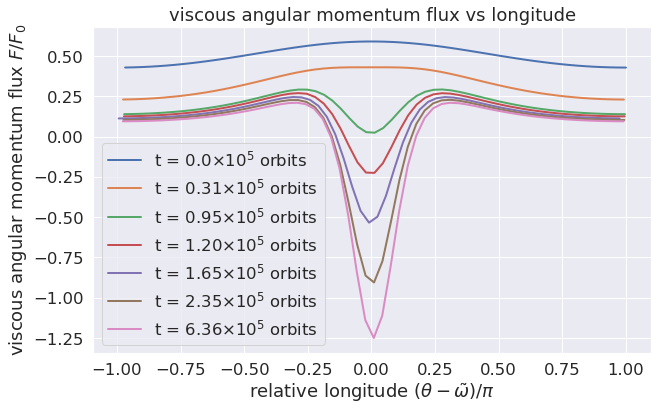

In [178]:
#viscous flux vs longitude...factor of X2 problem???
f, ax = plt.subplots(figsize=(10, 6))
t_idxs = (np.array([0.0, 0.05, 0.15, 0.19, 0.26, 0.37, 1.0])*total_number_of_outputs)\
    .astype(int)
for t_idx in t_idxs:
    viscous_flux_outer = viscous_flux[t_idx][1]
    r_outer = r[t_idx][1]
    t_outer = t[t_idx][1]
    wt_outer = wt[t_idx][1]
    pidx = r_outer.argmin()
    wt_outer_min = wt_outer[pidx]
    t_rotating = adjust_angle(t_outer - wt_outer_min)
    y = viscous_flux_outer/viscous_flux0
    x = t_rotating/np.pi
    idx = np.argsort(t_rotating)
    x = x[idx]
    y = y[idx]
    N_orbits = times[t_idx]/twopi/1.0e5
    lbl = r't = ' + str(N_orbits)[0:4] + r'$\times10^5$ orbits'
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
p = ax.set_title(r'viscous angular momentum flux vs longitude')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r'viscous angular momentum flux $F/F_0$')
p = plt.legend()